<a href="https://colab.research.google.com/github/hugocbs/IGTI-Machine-Lerning/blob/master/algoritmos_de_mineracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exemplo do algoritmo  não supervisionado k-means**

In [1]:
#importa as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt


In [2]:
#cria dados aleatórios
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

In [3]:
#cria o dataframe
df = DataFrame(dados,columns=['x','y'])
print (df.head())

    x   y
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


In [4]:
#adiciona as bibliotecas para construir o algoritmo
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=2)    # cria o objeto de para o algoritmo k-means para encontrar 2 clusters
kmeans.fit(df)  #aplica o algoritmo
centroides = kmeans.cluster_centers_   #encontra as coordenadas dos centroids
print(centroides)

[[38.75       61.625     ]
 [47.07142857 22.14285714]]


Text(0, 0.5, 'Y')

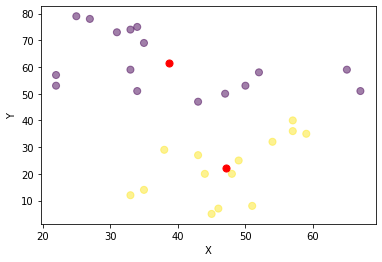

In [6]:
#realiza o plot do gráfico da saída
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)
plt.xlabel("X")
plt.ylabel("Y")

**Exemplo do algoritmo Supervisionado  - KNN**

In [7]:
#importando as bibliotecas 
import pylab as pl # utilizado para plotar os gráficos
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [8]:
#cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()


In [9]:
#Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [10]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0

[5 rows x 5 columns]


In [11]:
#transforma os dados em array
X = df_iris.iloc[:, :-1].values  #dados de entrada
y = df_iris.iloc[:, 4].values  # saídas ou target

In [12]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# divide 20% para teste

In [14]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [17]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 8  1  0]
 [ 0 11  2]
 [ 0  0  8]]
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.92      0.85      0.88        13
         2.0       0.80      1.00      0.89         8

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.91      0.90      0.90        30



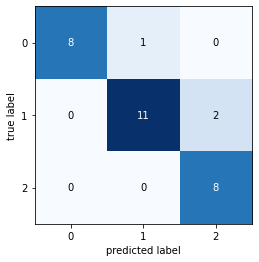

In [18]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo do algoritmo Supervisionado  - Árvore de Decisão**

In [38]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação


In [39]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

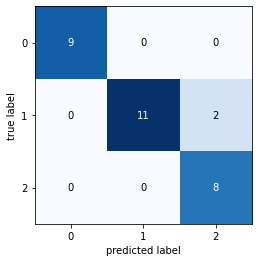

In [40]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [41]:
#visualização da árvore de decisão
#impor das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

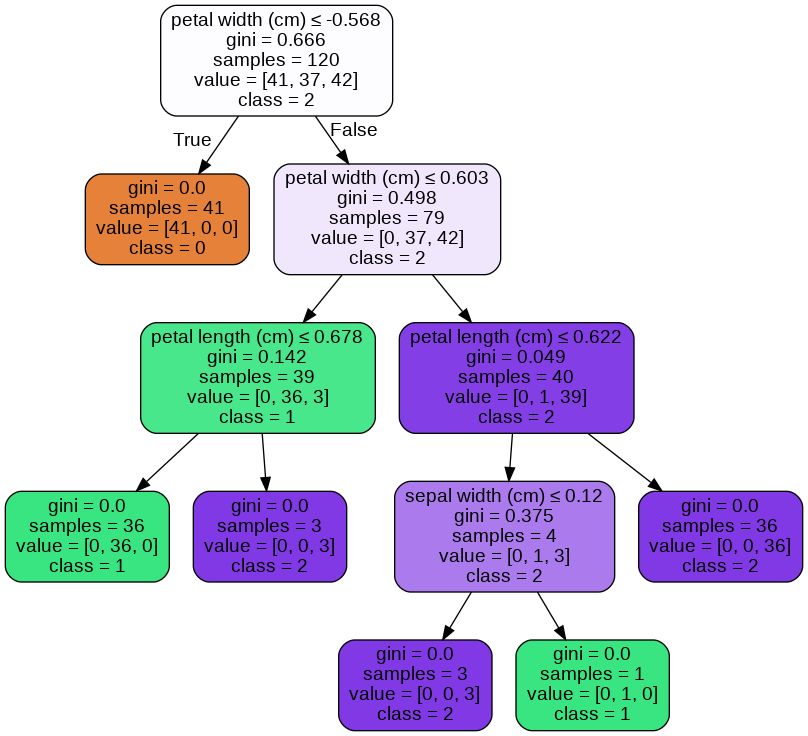

In [42]:
#Constrói a árvore de decisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

**Exemplo do algoritmo Supervisionado  - Suppor Vector Machine (SVM)**

In [24]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [25]:
#cria o objeto SVM
clf = SVC(gamma='auto')  #escolhe o  

In [26]:
#realiza a classificação via SVM
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

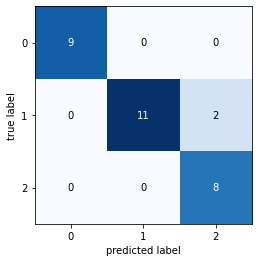

In [28]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo de Redes Neurais**

In [29]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier

In [30]:
#define a configuração da rede
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1) #rede com escondidas com 5 neurônios cada 

In [31]:
#realiza o fit do modelo
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [32]:
#realiza a previsão
y_pred=clf.predict(X_test)

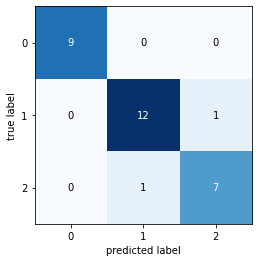

In [34]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()